<a href="https://colab.research.google.com/github/Ianyliu/scanpy-tutorials/blob/main/scanpy_workshop/day1_01_GColab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Install all packages for the tutorial.

In [1]:
# !pip install scanpy==1.4.6 umap-learn==0.4.0 anndata==0.7.1 numpy==1.18.2 scipy==1.4.1 pandas matplotlib scrublet seaborn python-igraph==0.8.0 louvain==0.6.1
!pip install scanpy umap-learn==0.4.0 anndata "numpy<2.0" scipy pandas matplotlib scrublet seaborn python-igraph louvain

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 68.1/68.1 kB 5.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.0/61.0 kB 3.7 MB/s eta 0:00:00
INFO: pip is looking at multiple versions of scanpy to determine which version is compatible with other requirements. This could take a while.
INFO: pip is still looking at multiple versions of scanpy to determine which version is compatible with other requirements. This could take a while.
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 647.5/647.5 kB 19.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 73.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 144.5/144.5 kB 11.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.3/18.3 MB 94.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.4/4.4 MB 102.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 57.4 MB/s eta 0

Load all required packages.

In [1]:
import scanpy as sc
import anndata as ann
import numpy as np
import scipy as sp
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import rcParams
from matplotlib import colors

import os
#doublet detection
import scrublet as scr

#pretty plotting
import seaborn as sb



/usr/local/lib/python3.11/dist-packages/anndata/utils.py:434: FutureWarning: Importing read_csv from `anndata` is deprecated. Import anndata.io.read_csv instead.
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.11/dist-packages/anndata/utils.py:434: FutureWarning: Importing read_excel from `anndata` is deprecated. Import anndata.io.read_excel instead.
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.11/dist-packages/anndata/utils.py:434: FutureWarning: Importing read_hdf from `anndata` is deprecated. Import anndata.io.read_hdf instead.
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.11/dist-packages/anndata/utils.py:434: FutureWarning: Importing read_loom from `anndata` is deprecated. Import anndata.io.read_loom instead.
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.11/dist-packages/anndata/utils.py:434: FutureWarning: Importing read_mtx from `anndata` is deprecated. Import anndata.io.read_mtx instead.
  warnings.warn(msg, FutureWarning)
/usr

In [2]:
plt.rcParams['figure.figsize']=(8,8) #rescale figures
sc.settings.verbosity = 3
#sc.set_figure_params(dpi=200, dpi_save=300)
sc.logging.print_versions()


-----
anndata     0.11.4
scanpy      1.9.8
-----
Cython                      3.0.12
PIL                         11.2.1
astunparse                  1.6.3
backcall                    0.2.0
backports                   NA
bottleneck                  1.4.2
cairo                       1.28.0
certifi                     2025.06.15
cloudpickle                 3.1.1
cupy                        13.3.0
cupy_backends               NA
cupyx                       NA
cycler                      0.12.1
cython                      3.0.12
cython_runtime              NA
dask                        2024.12.1
dateutil                    2.9.0.post0
debugpy                     1.8.0
decorator                   4.4.2
defusedxml                  0.7.1
dill                        0.3.7
fastrlock                   0.8.3
google                      NA
h5py                        3.14.0
httplib2                    0.22.0
igraph                      0.11.9
iniconfig                   NA
ipykernel                  

/usr/local/lib/python3.11/dist-packages/session_info/main.py:213: UserWarning: The '__version__' attribute is deprecated and will be removed in MarkupSafe 3.1. Use feature detection, or `importlib.metadata.version("markupsafe")`, instead.
  mod_version = _find_version(mod.__version__)


Of note, this notebook was created as part of a workshop, so we use extra large legend texts in all seaborn plots. You can set the context as well to 'talk' or 'paper'.

In [3]:
sb.set_context(context='poster')


## Set project file paths

Let us set up the connection with Google Drive.

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


We set up the file paths to the respective directories.

In [5]:
file_path = '/content/drive/My Drive/' #this is the file path to your google drive (main directory)

In [ ]:
# os.listdir(file_path) #shows all files in file_path

File path to the raw data. They are usually stored at a different location than the rest of the project.

In [7]:
file_path_raw = file_path + '3k_PBMC/'

The data directory contains all processed data and `anndata` files.

In [8]:
# data_dir = file_path + 'day1_beginner/data/'
data_dir = r"/content/drive/Shareddrives/Backup Stuff/raw_gene_bc_matrices"

The tables directory contains all tabular data output, e.g. in `.csv` or `.xls` file format. That applies to differential expression test results or overview tables such as the number of cells per cell type.

In [9]:
# table_dir = file_path + 'day1_beginner/tables/'
table_dir = r"/content/drive/Shareddrives/Backup Stuff/raw_gene_bc_matrices"

The default figure path is a POSIX path calles 'figures'. If you don't change the default figure directory, scanpy creates a subdirectory where this notebook is located.  

In [10]:
# sc.settings.figdir = file_path + 'day1_beginner/figures/'
sc.settings.figdir = r"/content/drive/Shareddrives/Backup Stuff/raw_gene_bc_matrices"

**Comment:** When you repeat certain analyses, it might be helpful to set a `date` variable and add it to every figure and table (see `datetime` Python package).

# Read data

The dataset consists of 4k PBMCs (Human) provided by 10X Genomics. The data is an mtx directory with an `mtx` file (*i.e.* count matrix), two `tsv` files with barcodes (*i.e.* cell indices) and features (*i.e.* gene symbols). `Scanpy` unpacks the files (if the files are in `gz` archive format) and creates an `anndata` object with the `read_10x_mtx` function.    

The dataset is not filtered, yet.

Data link: https://support.10xgenomics.com/single-cell-gene-expression/datasets/1.2.0/pbmc4k?

In [11]:
file_path_raw = file_path_raw + 'raw_gene_bc_matrices/'


In [12]:
file_path_raw = r"/content/drive/Shareddrives/Backup Stuff/raw_gene_bc_matrices/GRCh38/"
adata_raw = sc.read_10x_mtx(path=file_path_raw)

--> This might be very slow. Consider passing `cache=True`, which enables much faster reading from a cache file.


Let us check the dataset size.

In [13]:
adata_raw.shape

(737280, 33694)

In [14]:
print('Total number of observations: {:d}'.format(adata_raw.n_obs))

Total number of observations: 737280


**Comment:** End of first session.

# Pre-processing and visualization

## Remove empty droplets

The dataset contains an excessive amount of "cells", which are in fact empty droplets. Let us remove these barcodes prior to further quality control. In R, there is the emptyDrops package to distinguish empty droplets from actual cells. We do not have access to an R kernel on Google Colabs, therefore, we select all cells with less than 100 counts in total to estimate the background signal.

It must be noted that CellRanger 3.0 has incorporated the EmptyDrops algorithm to distinguish cells from empty droplets.

Let us examine the barcodes with less than 100 counts.

In [15]:
#compute number of total counts
adata_raw.obs['n_counts'] = np.sum(adata_raw.X, axis=1)
adata_empty = adata_raw[adata_raw.obs['n_counts']<100].copy()
adata_empty

AnnData object with n_obs × n_vars = 732056 × 33694
    obs: 'n_counts'
    var: 'gene_ids'

Estimate the gene composition in the background. Compute the number of counts per gene over all cells first.

In [16]:
adata_empty.var['total_gene']= np.sum(adata_empty.X, axis=0).A1

Compute the contribution of a gene to the background signal as the total number of counts of a gene over all cells divided by the total number of counts.

In [17]:
adata_empty.var['frac_gene'] = adata_empty.var['total_gene']*100 / np.sum(adata_empty.var['total_gene'])


Display the top 10 genes with the strongest contribution to the background.

In [18]:
adata_empty.var['frac_gene'].sort_values(ascending=False)[:10]

,frac_gene
MALAT1,3.493015
B2M,2.087122
TMSB4X,1.678926
RPS27,1.015653
RPL13,0.857120
RPL34,0.849157
RPLP1,0.842787
RPL13A,0.841275
RPL21,0.810022
RPS12,0.805205


Let us create a filtered data matrix by filtering out all barcodes with less than 100 counts per barcode.

In [19]:
filter_bool, filter_idx = sc.pp.filter_cells(adata_raw, min_counts=100, inplace=False)

filtered out 732056 cells that have less than 100 counts


In [20]:
adata = adata_raw[filter_bool].copy()

In [21]:
adata

AnnData object with n_obs × n_vars = 5224 × 33694
    obs: 'n_counts'
    var: 'gene_ids'

Save the filtered data set to file.

In [22]:
adata.write(data_dir + 'data_filtered.h5ad')

## Quality control

Read data from file to begin with the quality control.

In [23]:
adata = sc.read(data_dir + 'data_filtered.h5ad')

/usr/local/lib/python3.11/dist-packages/anndata/__init__.py:42: FutureWarning: `anndata.read` is deprecated, use `anndata.read_h5ad` instead. `ad.read` will be removed in mid 2024.
  warnings.warn(


Data quality control can be split into cell QC and gene QC. Typical quality measures for assessing the quality of a cell include the number of molecule counts (UMIs), the number of expressed genes, and the fraction of counts that are mitochondrial. A high fraction of mitochondrial reads being picked up can indicate cell stress, as there is a low proportion of nuclear mRNA in the cell. It should be noted that high mitochondrial RNA fractions can also be biological signals indicating elevated respiration.

We start with calculating the QC covariates:

* total number of counts per cell
* number of expressed genes per cell
* fraction of mitochondrial reads per cell

**Task:** Compute the library size (i.e. the total number of counts per cell), compute the log-scaled library size and the number of expressed genes per cell.

**BONUS:** Compute the mean gene expression and the fraction of cells that express a gene. Compute the mean gene expression per batch, donor and replicate.

In [24]:
# Quality control - calculate QC covariates
adata.obs['n_counts'] = adata.X.sum(axis = 1)
adata.obs['log_counts'] = np.log1p(adata.obs['n_counts'])
adata.obs['n_genes'] = (adata.X > 0).sum(axis = 1) # number of expressed genes (genes with count > 0 for each cell)

# --- BONUS Calculations ---

# Compute the mean gene expression
# This calculates the average expression of each gene across all cells
adata.var['mean_expression'] = adata.X.mean(axis=0).A1

# Compute the fraction of cells that express a gene
# This calculates the proportion of cells in which each gene has a count greater than 0
adata.var['fraction_cells_expressing'] = (adata.X > 0).sum(axis=0).A1 / adata.shape[0]

# # Compute the mean gene expression per batch, donor and replicate
# # Iterate through unique categories in 'batch', 'donor', and 'replicate'
# # and calculate the mean expression for each gene within those subgroups.

# for batch in adata.obs['batch'].unique():
#     # Create a boolean mask for cells belonging to the current batch
#     mask = adata.obs['batch'] == batch
#     # Ensure there are cells for this batch before computing mean
#     if adata[mask, :].shape[0] > 0:
#         adata.var[f'mean_expression_batch_{batch}'] = adata[mask, :].X.mean(axis=0).A1
#     else:
#         # If no cells for a particular batch, fill with NaN or 0 depending on interpretation
#         adata.var[f'mean_expression_batch_{batch}'] = np.nan

# for donor in adata.obs['donor'].unique():
#     mask = adata.obs['donor'] == donor
#     if adata[mask, :].shape[0] > 0:
#         adata.var[f'mean_expression_donor_{donor}'] = adata[mask, :].X.mean(axis=0).A1
#     else:
#         adata.var[f'mean_expression_donor_{donor}'] = np.nan

# for replicate in adata.obs['replicate'].unique():
#     mask = adata.obs['replicate'] == replicate
#     if adata[mask, :].shape[0] > 0:
#         adata.var[f'mean_expression_replicate_{replicate}'] = adata[mask, :].X.mean(axis=0).A1
#     else:
#         adata.var[f'mean_expression_replicate_{replicate}'] = np.nan

# print("Bonus QC metrics have been computed and stored in adata.var.")
# print("You can access them like: adata.var['mean_expression'], adata.var['fraction_cells_expressing'],")
# print("adata.var['mean_expression_batch_batch1'], etc.")

Compute the fraction of mitochondrial genes. Note: mitochondrial genes in human start with 'MT-'.

In [25]:
mt_gene_mask = np.flatnonzero([gene.startswith('MT-') for gene in adata.var_names])

# Ensure mt_gene_mask is not empty before attempting to sum
if mt_gene_mask.size > 0:
    # the `.A1` is only necessary as X is sparse (to transform to a dense array after summing)
    adata.obs['mt_frac'] = np.sum(adata[:, mt_gene_mask].X, axis=1).A1/adata.obs['n_counts']
else:
    adata.obs['mt_frac'] = 0.0 # Or np.nan, depending on desired behavior if no MT genes

Let us visualize the number of expressed genes and the number of counts as a scatter plot.

**Task:** Create a scatter plot with the library size against the number of genes. Create a second plot, where you only show cells with a library size of less than 10,000 counts. Color by the fraction of mitochondrial reads.

**Questions:** How can we describe the relation of library size vs number of expressed genes vs mitochondrial reads?

**BONUS:** Plot the highest expressed genes.



/usr/local/lib/python3.11/dist-packages/scanpy/plotting/_utils.py:716: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  color = color[sort]


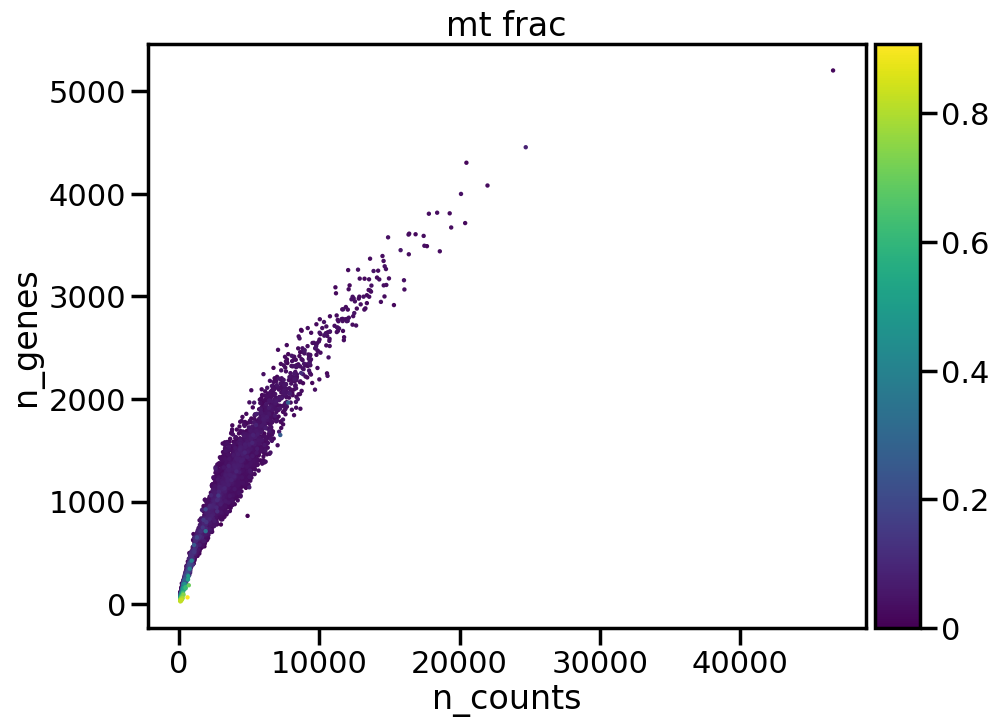

/usr/local/lib/python3.11/dist-packages/scanpy/plotting/_utils.py:716: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  color = color[sort]


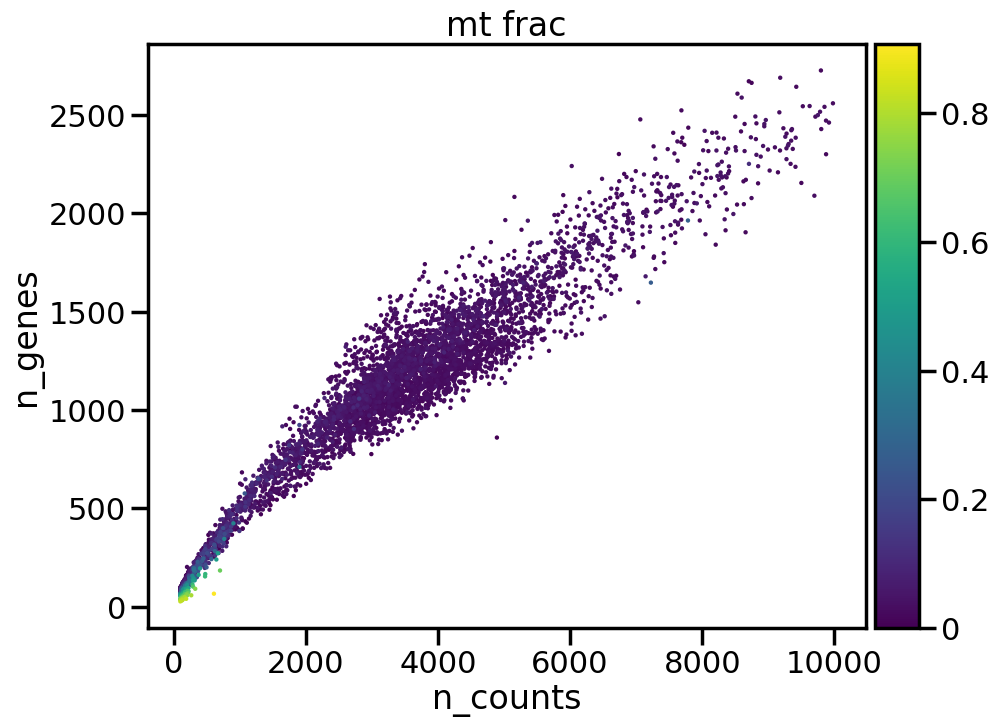

normalizing counts per cell


/usr/local/lib/python3.11/dist-packages/anndata/_core/storage.py:39: ImplicitModificationWarning: X should not be a np.matrix, use np.ndarray instead.
  warnings.warn(msg, ImplicitModificationWarning)


    finished (0:00:02)


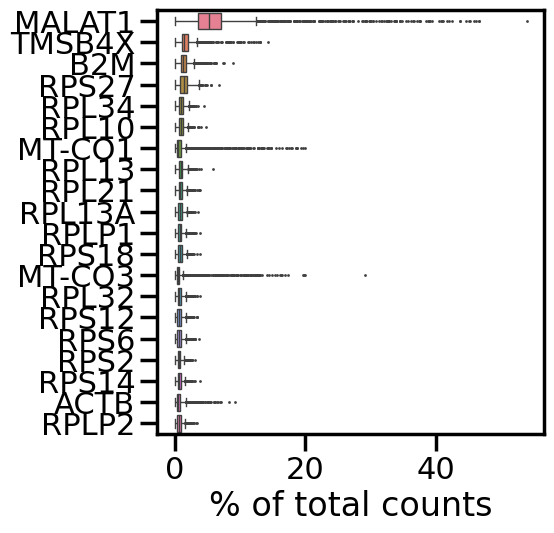

In [26]:
#Data quality summary plots
p1 = sc.pl.scatter(adata = adata, x='n_counts' , y='n_genes', color='mt_frac', size=40)
#hint: temporary subsetting of the anndata object by .obs works like adata[adata.obs['key']<value]
p2 = sc.pl.scatter(adata = adata[adata.obs['n_counts'] < 10000], x='n_counts', y='n_genes',
                   color='mt_frac', size=40)

# BONUS: plot highest expressed gnes
# Convert adata.X to a dense matrix before plotting highest expressed genes
if isinstance(adata.X, (sp.sparse.csc_matrix, sp.sparse.csr_matrix)):
    adata_dense = adata.copy()
    adata_dense.X = adata_dense.X.todense()
    p3 = sc.pl.highest_expr_genes(adata_dense, n_top=20, show=True) # Plot the top 20 highest expressed genes
else:
    p3 = sc.pl.highest_expr_genes(adata, n_top=20, show=True) # Plot the top 20 highest expressed genes

**Task:** Below, you find a the code to create a violin plot of the library size. Create another two violin plots displaying the number of genes and the fraction of mitochondrial reads.

**Questions:** How do the count data distribute within the sample?


/usr/local/lib/python3.11/dist-packages/scanpy/plotting/_anndata.py:839: FutureWarning: 

The `scale` parameter has been renamed and will be removed in v0.15.0. Pass `density_norm='width'` for the same effect.
  ax = sns.violinplot(


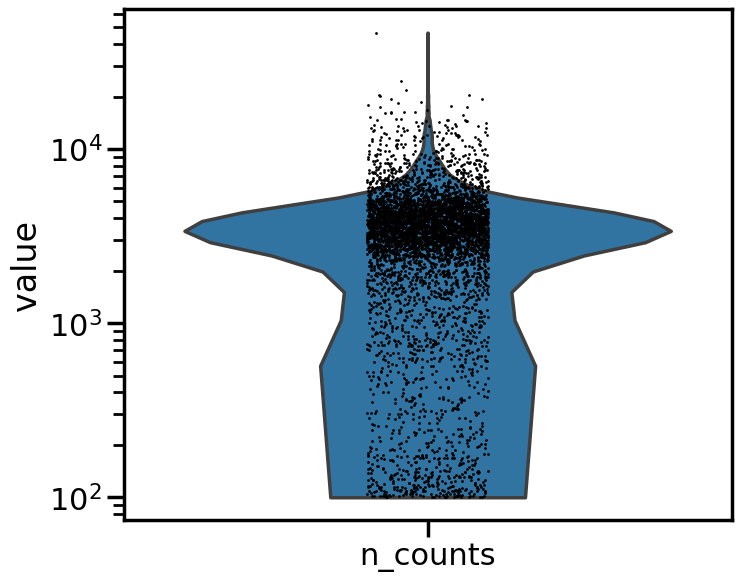

/usr/local/lib/python3.11/dist-packages/scanpy/plotting/_anndata.py:839: FutureWarning: 

The `scale` parameter has been renamed and will be removed in v0.15.0. Pass `density_norm='width'` for the same effect.
  ax = sns.violinplot(


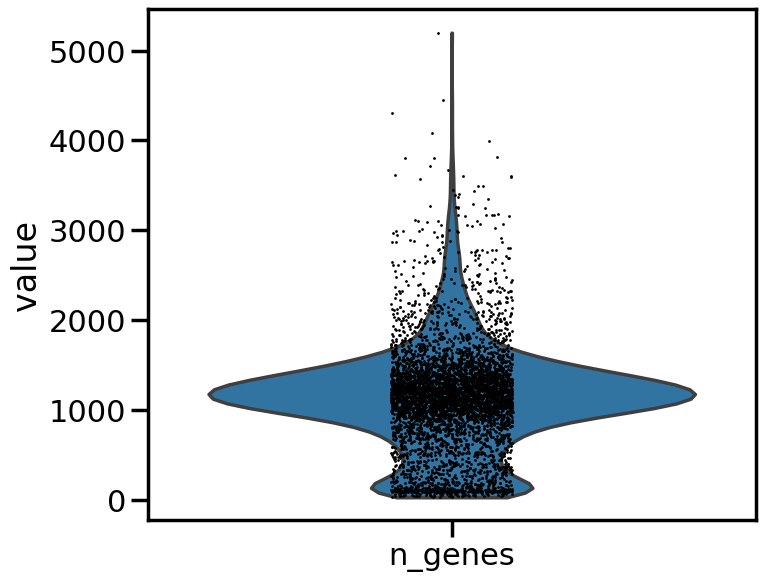

/usr/local/lib/python3.11/dist-packages/scanpy/plotting/_anndata.py:839: FutureWarning: 

The `scale` parameter has been renamed and will be removed in v0.15.0. Pass `density_norm='width'` for the same effect.
  ax = sns.violinplot(


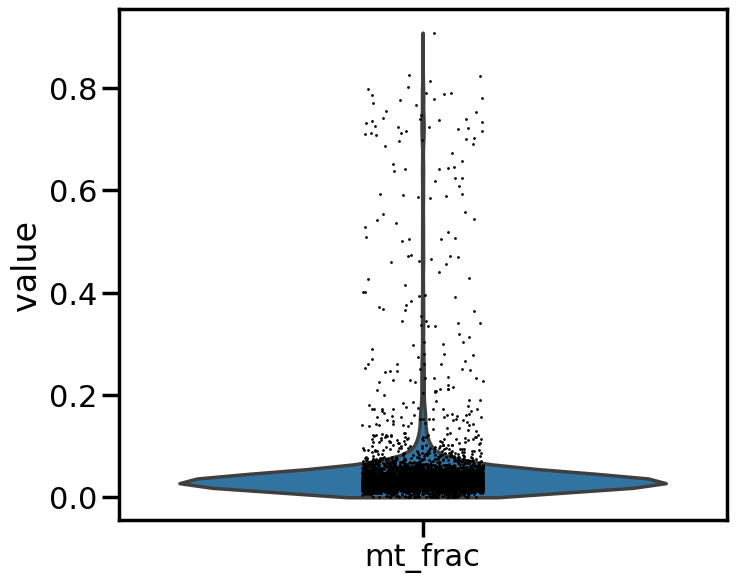

In [27]:
#Sample quality plots
rcParams['figure.figsize']=(7,7)
t1 = sc.pl.violin(adata, 'n_counts',
                  #groupby='sample',
                  size=2, log=True, cut=0)
t1 = sc.pl.violin(adata, "n_genes",
                  size=2,
                  # log=True
                  ) #display number of genes
t2 = sc.pl.violin(adata, "mt_frac",
                  size=2,
                  # log=True
                  ) #display the fraction of mitochondrial reads

**Conclusions:** By looking at plots of the number of genes versus the number of counts with MT fraction information, we can assess whether there are cells with unexpected summary statistics. It is important here to look at these statistics jointly.  We should probably still filter out some cells with very few genes as these may be difficult to annotate later. This will be true for the initial cellular density between 1000-4000 counts and < ~500 genes.

Furthermore it can be seen in the main cloud of data points, that cells with lower counts and genes tend to have a higher fraction of mitochondrial counts. These cells are likely under stress or are dying. When apoptotic cells are sequenced, there is less mRNA to be captured in the nucleus, and therefore fewer counts overall, and thus a higher fraction of counts fall upon mitochondrial RNA. If cells with high mitochondrial activity were found at higher counts/genes per cell, this would indicate biologically relevant mitochondrial activity.

**Task:** Create a histogram for the total number of counts. Further, create a histogram for the low count and high count regime, each. Here, you have to decide on a reasonable threshold.

Note: `pandas` does some histogram plotting with `adata.obs['n_counts'].hist()`, howecer, you will obtain prettier plots with `distplot` from `seaborn`.    

/tmp/ipython-input-28-3655973504.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  p3 = sb.distplot(adata.obs['n_counts'],
/tmp/ipython-input-28-3655973504.py:10: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  p4 = sb.distplot(adata[adata.obs['n_counts'] < 1000].obs['n_counts'], #histogram for low count regime
/tmp/ipyt

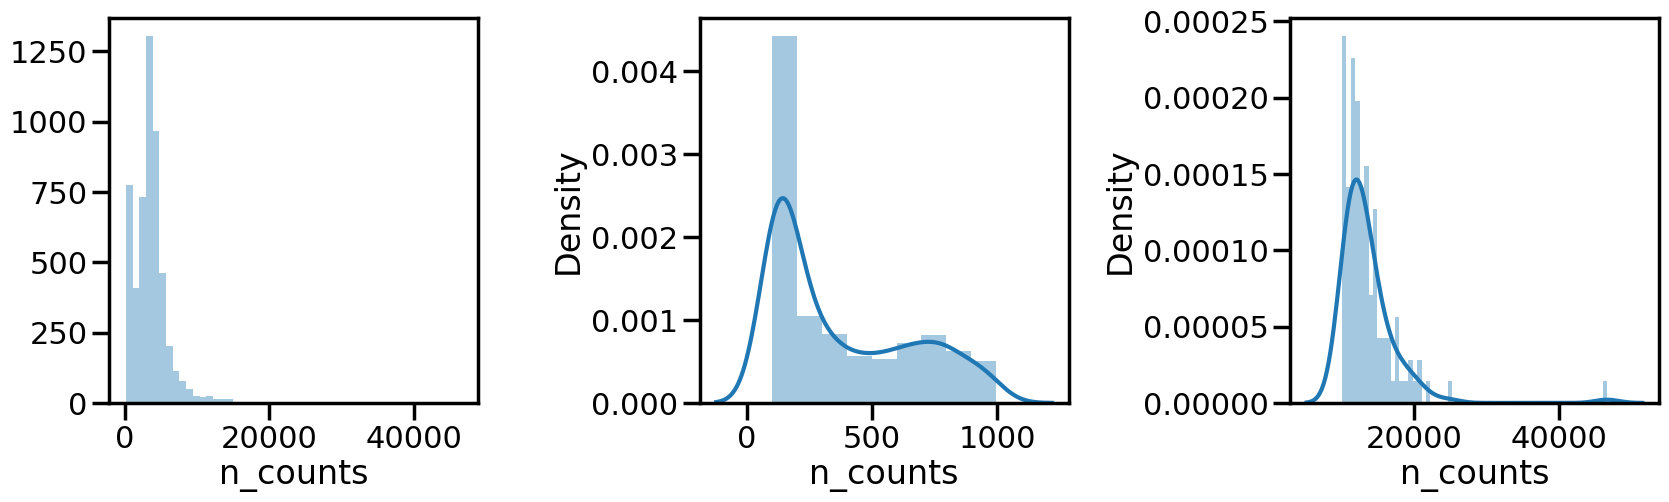

In [28]:
#Thresholding decision: counts
rcParams['figure.figsize']=(20,5)
fig_ind=np.arange(131, 134)
fig = plt.figure()
fig.subplots_adjust(hspace=0.4, wspace=0.6)

p3 = sb.distplot(adata.obs['n_counts'],
                 kde=False,
                 ax=fig.add_subplot(fig_ind[0]))
p4 = sb.distplot(adata[adata.obs['n_counts'] < 1000].obs['n_counts'], #histogram for low count regime
                 ax=fig.add_subplot(fig_ind[1]))
p5 = sb.distplot(
    adata[adata.obs['n_counts'] > 10000].obs['n_counts'], #histogram for high count regime
    bins=60,
    # kde=False,
                 ax=fig.add_subplot(fig_ind[2]))
plt.show()

**Conclusions:**
Histograms of the number of counts per cell show a small peak of groups of cells with fewer than **500** counts, which are likely uninformative given the overall distribution of counts. This may be cellular debris found in droplets.

On the upper end of counts, we see a population of cells with high counts with decaying slope at **15,000** counts. We estimate this population to range until **20,000** counts. This estimation is performed by visually tracing a Gaussian around the population.

**Task:** Create a histogram for the total number of genes. Further, create a histogram for the low gene count regime.

/tmp/ipython-input-29-788564937.py:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  p6 = sb.distplot(adata.obs['n_genes'], kde=False, bins=60, ax=fig.add_subplot(fig_ind[0]))
/tmp/ipython-input-29-788564937.py:10: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  p7 = sb.distplot( adata[adata.obs['n_genes'] < 1000].obs['n_ge

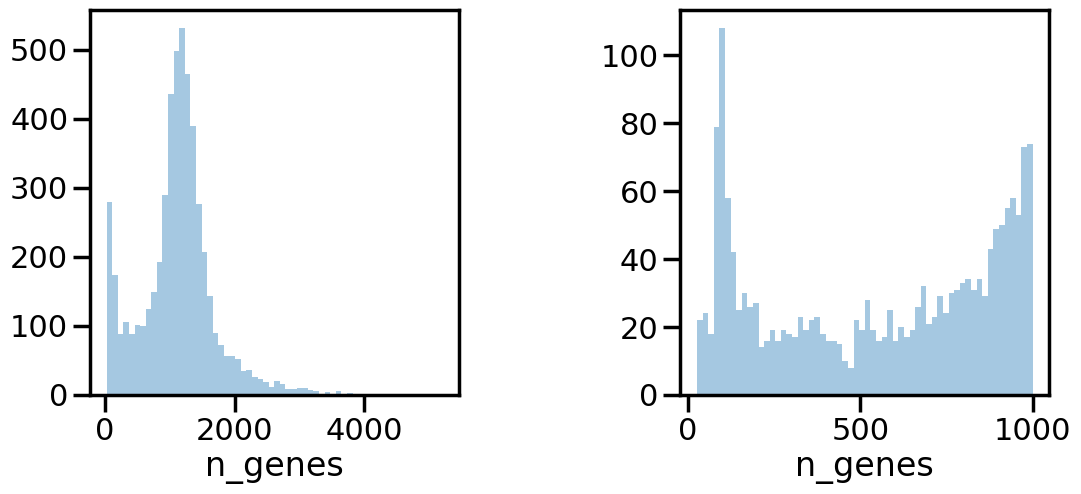

In [29]:
#Thresholding decision: genes

rcParams['figure.figsize']=(20,5)
fig_ind=np.arange(131, 133)
fig = plt.figure()
fig.subplots_adjust(hspace=0.4, wspace=0.6) #create a grid for subplots

p6 = sb.distplot(adata.obs['n_genes'], kde=False, bins=60, ax=fig.add_subplot(fig_ind[0]))
#low number of genes regime
p7 = sb.distplot( adata[adata.obs['n_genes'] < 1000].obs['n_genes'], kde=False, bins=60, ax=fig.add_subplot(fig_ind[1]))
plt.show()

**Conclusions:**
Two populations of cells with low gene counts can be seen in the above plots. Given these plots, and the plot of genes vs counts above, we decide to filter out cells with fewer than **500** genes expressed. Below this we are likely to find dying cells or empty droplets with ambient RNA. Looking above at the joint plots, we see that we filter out the main density of low gene cells with this threshold.

In general it is a good idea to be permissive in the early filtering steps, and then come back to filter out more stringently when a clear picture is available of what would be filtered out. This is available after visualization/clustering. For demonstration purposes we stick to a simple (and slightly more stringent) filtering here.

**Task:** Create a histogram for the fraction of mitochondrial genes. Further, create a histogram for the high fraction regime.

/tmp/ipython-input-30-4224374751.py:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  p8 = sb.distplot( adata.obs['mt_frac'], #display the fraction of mitochondrial reads
/tmp/ipython-input-30-4224374751.py:11: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  p9 = sb.distplot(  adata[adata.obs['mt_frac'] >= 0.2].obs['mt_frac

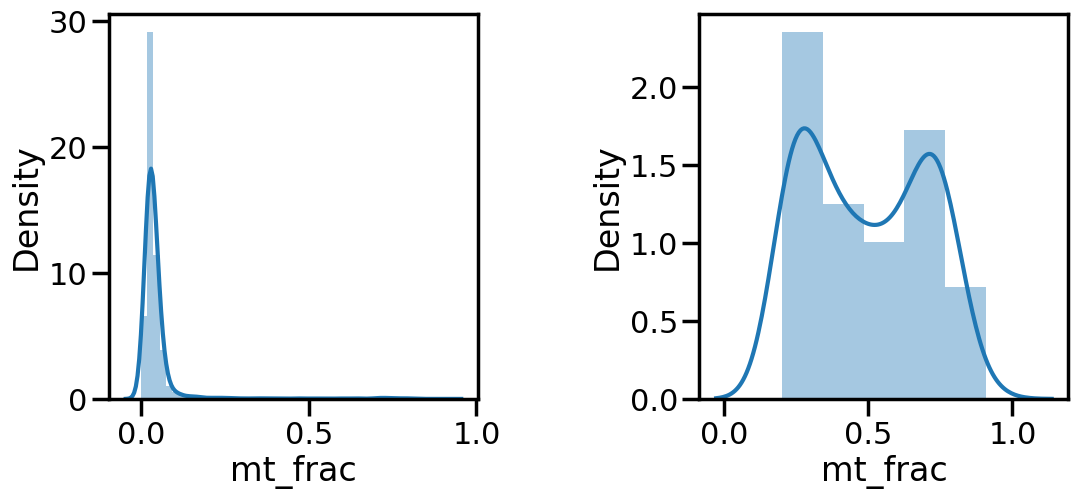

In [30]:
#Thresholding decision: mitochondrial reads

rcParams['figure.figsize']=(20,5)
fig_ind=np.arange(131, 133)
fig = plt.figure()
fig.subplots_adjust(hspace=0.4, wspace=0.6)

p8 = sb.distplot( adata.obs['mt_frac'], #display the fraction of mitochondrial reads
                 ax=fig.add_subplot(fig_ind[0]))

p9 = sb.distplot(  adata[adata.obs['mt_frac'] >= 0.2].obs['mt_frac'], #display the fraction of mitochondrial reads for the high fraction (in this case a threshold of 0.2 as high)
                 ax=fig.add_subplot(fig_ind[1]))
plt.show()

**Task:** Filter your cells according for the total number of counts, number of expressed genes and fraction of mitochondrial reads. Check the number of remaining cells after each filtering step.

In [31]:
# Filter cells according to identified QC thresholds:
print('Total number of cells: {:d}'.format(adata.n_obs))

sc.pp.filter_cells(adata, min_counts = 500)
print('Number of cells after min count filter: {:d}'.format(adata.n_obs))

sc.pp.filter_cells(adata, max_counts = 20000)
print('Number of cells after max count filter: {:d}'.format(adata.n_obs))

adata = adata[adata.obs['mt_frac'] < 0.2]
print('Number of cells after MT filter: {:d}'.format(adata.n_obs))

sc.pp.filter_cells(adata, min_genes = 700)
print('Number of cells after gene filter: {:d}'.format(adata.n_obs))

Total number of cells: 5224
filtered out 520 cells that have less than 500 counts
Number of cells after min count filter: 4704
filtered out 6 cells that have more than 20000 counts
Number of cells after max count filter: 4698
Number of cells after MT filter: 4682
filtered out 497 cells that have less than 700 genes expressed


/usr/local/lib/python3.11/dist-packages/scanpy/preprocessing/_simple.py:139: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  adata.obs['n_genes'] = number


Number of cells after gene filter: 4185


**Task:** Next, filter out non-expressed genes. Check the number of remaining genes after filtering.

In [32]:
#Filter genes:
print('Total number of genes: {:d}'.format(adata.n_vars))

# Min 20 cells - filters out 0 count genes
sc.pp.filter_genes(adata, min_cells=20)

print('Number of genes after cell filter: {:d}'.format(adata.n_vars))

Total number of genes: 33694
filtered out 21568 genes that are detected in less than 20 cells
Number of genes after cell filter: 12126


The filtering is performed based on the thresholds we identified from the QC plots. Genes are also filtered if they are not detected in at least **XX** cells. This reduces the dimensions of the matrix by removing 0 count genes and genes which are not sufficiently informative of the dataset.

### Doublet score

Let us estimate the amount of doublets in the dataset. Here, we use the tool `scrublet` that simulates doublet gene expression profiles based on the data. We apply it for each sample separately.

In [33]:
# filtering/preprocessing parameters:
min_counts = 2
min_cells = 3
vscore_percentile = 85
n_pc = 50

# doublet detector parameters:
expected_doublet_rate = 0.02
sim_doublet_ratio = 3
n_neighbors = 15



scrub = scr.Scrublet(counts_matrix = adata.X,
                     n_neighbors = n_neighbors,
                     sim_doublet_ratio = sim_doublet_ratio,
                     expected_doublet_rate = expected_doublet_rate)

doublet_scores, predicted_doublets = scrub.scrub_doublets(
                    min_counts = min_counts,
                    min_cells = min_cells,
                    n_prin_comps = n_pc,
                    use_approx_neighbors = True,
                    get_doublet_neighbor_parents = False)

adata.obs['doublet_score'] = doublet_scores
adata.obs['doublet'] = predicted_doublets


Preprocessing...
Simulating doublets...
Embedding transcriptomes using PCA...
Calculating doublet scores...
Automatically set threshold at doublet score = 0.11
Detected doublet rate = 2.8%
Estimated detectable doublet fraction = 61.2%
Overall doublet rate:
	Expected   = 2.0%
	Estimated  = 4.6%
Elapsed time: 9.6 seconds


**Tasks:** Plot the doublet score as a histogram and as violin plot.

/tmp/ipython-input-34-1326307175.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sb.distplot(adata.obs['doublet_score']) #histogram of the doublet score


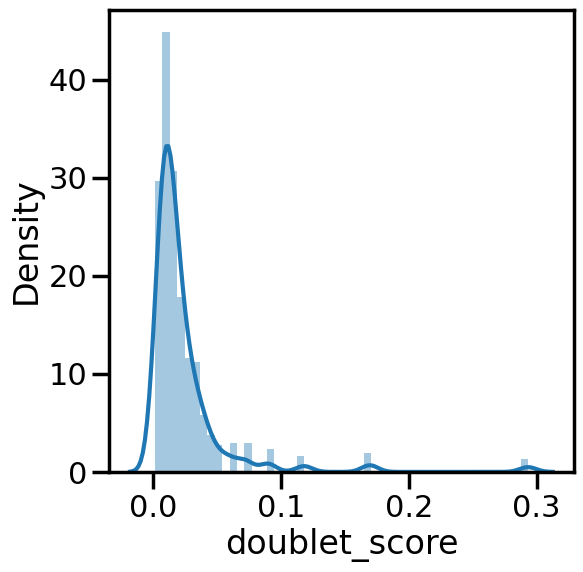

/usr/local/lib/python3.11/dist-packages/scanpy/plotting/_anndata.py:839: FutureWarning: 

The `scale` parameter has been renamed and will be removed in v0.15.0. Pass `density_norm='width'` for the same effect.
  ax = sns.violinplot(


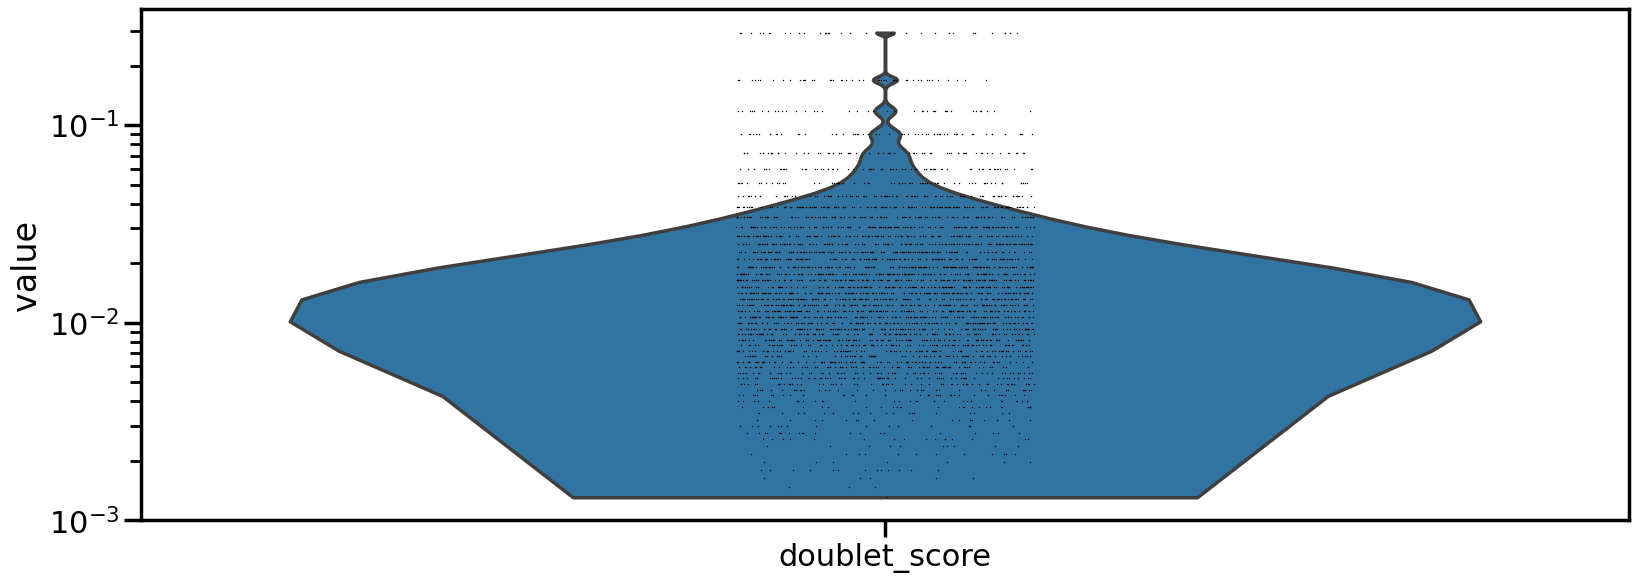

In [34]:
rcParams['figure.figsize']=(6,6)
sb.distplot(adata.obs['doublet_score']) #histogram of the doublet score
plt.show()

rcParams['figure.figsize']=(15,7)
sc.pl.violin(adata, 'doublet_score', log = True) #violin plot of the doublet score

### filtering doublets

Scrublet proposed a different threshold than we would choose based upon the histogram plot of the doublet scores.

**Tasks:** Decide on a threshold to filter doublets.

In [35]:
thr =  0.05
ix_filt = adata.obs['doublet_score']<=thr

adata = adata[ix_filt].copy()
print('Number of cells after doublet filter: {:d}'.format(adata.n_obs))

Number of cells after doublet filter: 3800


### Summarize sample information

In order to group by `batch` (for future purposes, because we presently deal with one sample), let us add a `batch` covariate to the `adata` object.

In [36]:
adata.obs['batch'] = '1'

df = adata.obs[['n_genes','n_counts', 'batch']]
df_all = pd.DataFrame(df.groupby(by='batch')['n_genes'].apply(np.mean).values,
                      index=df.groupby(by='batch')['n_genes'].apply(np.mean).index,
                      columns=['mean_genes'])

df_all['median_genes']=df.groupby(by='batch')['n_genes'].apply(np.median).values
df_all['mean_counts']=df.groupby(by='batch')['n_counts'].apply(np.mean).values
df_all['median_counts']=df.groupby(by='batch')['n_counts'].apply(np.median).values
df_all

,mean_genes,median_genes,mean_counts,median_counts
batch,,,,
1,1298.189474,1217.0,4096.174316,3669.5


Display table.

In [37]:
df_all

,mean_genes,median_genes,mean_counts,median_counts
batch,,,,
1,1298.189474,1217.0,4096.174316,3669.5


**Tasks:** Save the summary table to file (`csv` or `xlsx` format) to the `tables` subdirectory.

In [38]:
df_all.to_csv(table_dir + 'summary_table.csv')

**Comment:** End of second session.

## Normalization

So far, our dataset is a count matrix. Here, every count corresponds to an mRNA molecule captured in the scRNA-seq experiment. As not all mRNA molecules in a cell are captured, there is a variability in the total number of counts detected between cells that results from both the number of molecules that were in the cells, and the sampling. As we cannot assume that all cells contain an equal number of molecules (cell sizes can differ substantially), we have to estimate the number of molecules that were initially in the cells. In fact, we don't estimate the exact number of molecules, but instead estimate cell-specific factors that should be proportional to the true number of molecules. These are called size factors. Normalized expression values are calculated by dividing the measured counts by the size factor for the cell.

Several methods for normalization for scRNA-seq data have been proposed. Ideally, we want to apply the `scran` library size normalization followed by log-transformation. However, `scran` is again an R package, and we use the simpler normalisation to logCPM, `i.e.` we divide by the library size followed by the log-transformation. In addition, we save the count matrix to `layers` as 'counts'.

**Comment:** For `scran`, we have not (comprehensively) tested whether normalisation per sample or all samples jointly gives more accurate results. When we normalised per sample, observed many more differentially expressed genes across conditions (in the range of thousands). We think that normalisation per sample preserves a systematic bias while joint normalisation removes batch effects within the same cluster partially, if a cluster contains cell from several batches. No such effect of the normalisation can be observed when samples do not overlap at all. For the time being, we perform joint normalisation of all samples.

Save the count matrix as layer.

In [39]:
adata.layers['counts'] = adata.X.copy()

We use the logCPM normalisation: Normalise with the library size and log-scale.

In [40]:
sc.pp.normalize_per_cell(adata, counts_per_cell_after=1e4)
sc.pp.log1p(adata)

normalizing by total count per cell
    finished (0:00:00): normalized adata.X and added    'n_counts', counts per cell before normalization (adata.obs)


**Tasks:** Create a scatter plot of size factor vs library size and number of expressed genes, respectively.

**Questions:** How does the library size and number of expressed genes relate to each other? Can we determine cell type specific differences?


In [45]:
adata

AnnData object with n_obs × n_vars = 3800 × 12126
    obs: 'n_counts', 'log_counts', 'n_genes', 'mt_frac', 'doublet_score', 'doublet', 'batch'
    var: 'gene_ids', 'mean_expression', 'fraction_cells_expressing', 'n_cells'
    uns: 'log1p', 'batch_colors'
    layers: 'counts'

AttributeError: 'Legend' object has no attribute 'legendHandles'

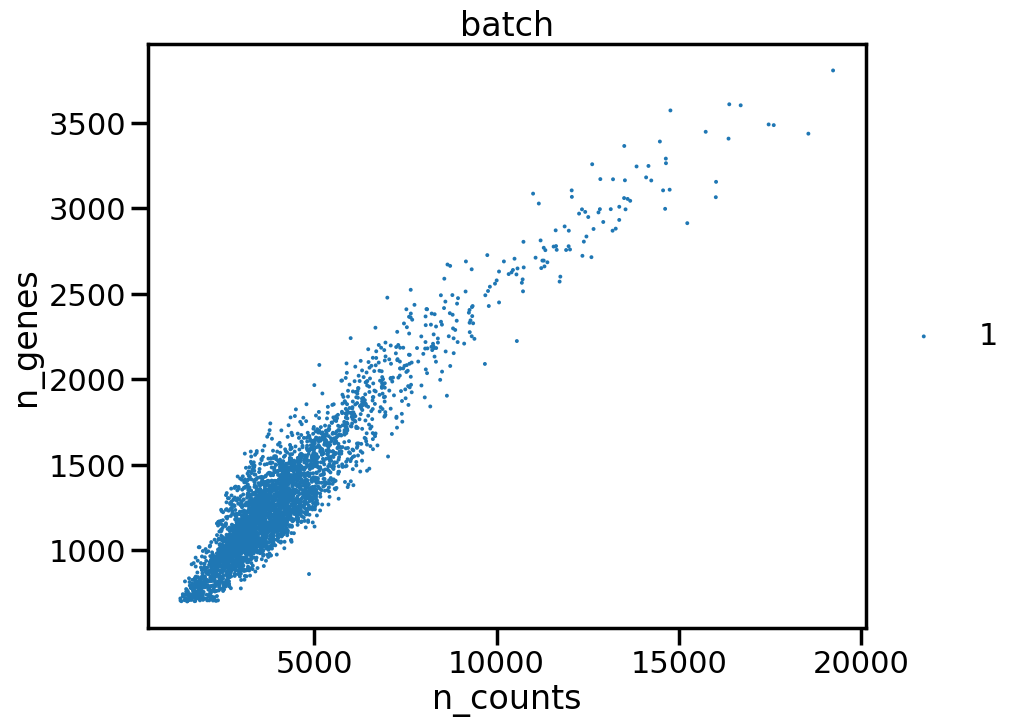

In [48]:
rcParams['figure.figsize']=(8,8)
sc.pl.scatter(adata, x='n_counts', y='n_genes', color = 'batch')

## Batch correction - general remarks

This dataset consists of a single batch, thus, batch effect correction is not an issue here. If you handle several batches, you may observe differences across samples, for instance, in the library size per dataset. Such differences may contribute to the batch effect. [Büttner et al., Nat Meth (2019)](https://www.nature.com/articles/s41592-018-0254-1) compared the performance of several batch correction methods. For low-to-medium complexity datasets, ComBat performed best among the tested tools. ComBat is also available in `scanpy` (see `sc.pp.combat`).

For high complexity data, especially when you encounter changes in cell type composition, consider to use a data integration method of your choice. We distinguish three different types, *i.e.* if the methods create a corrected data matrix (in feature space), an embedding or a knn-graph. Examples are:
1. feature space: MNN (`scanpy.external.pp.mnn_correct`), scanorama (integrates with scanpy), Seurat v3 (R based)
2. embedding: scVI (Python based), Harmony (R based), scanorama
3. knn-graph: conos (R based), BBKNN (`scanpy.external.pp.bbknn`)

Several benchmarking studies aimed to determine best performing methods. In simple cases, Seurat v3 and Harmony performed best [Tran et al., Genome Biology (2020)](https://genomebiology.biomedcentral.com/articles/10.1186/s13059-019-1850-9) and [Chazarra-Gil et al., biorxiv (2020)](https://www.biorxiv.org/content/10.1101/2020.05.22.111211v2). More complex scenarios have been benchmarked in [Luecken et al., biorxiv (2020)](https://www.biorxiv.org/content/10.1101/2020.05.22.111161v2), where BBKNN, Scanorama, and scVI performed well. Furthermore, Scanorama had high scores in the preservation of biological signals, while BBKNN tended to overcorrect. Moreover, Luecken et al. tested different pre-processing schemes. In general, **selecting highly variable genes prior to batch correction improved the batch effect correction result**. We continue with the selection of highly variable genes.


## Feature selection (Highly variable genes)

We extract highly variable genes (HVGs) to further reduce the dimensionality of the dataset and include only the most informative genes. Genes that vary substantially across the dataset are informative of the underlying biological variation in the data. As we only want to capture biological variation in these genes, we select highly variable genes after normalization and batch correction. HVGs are used for clustering, trajectory inference, and dimensionality reduction/visualization, while the full data set is used for computing marker genes, differential testing, cell cycle scoring, and visualizing expression values on the data.

Here we use a standard technique for the extraction of highly variable genes from the 10X genomics preprocessing software *CellRanger*. Typically between 1000 and 5000 genes are selected. Here, we extract the top 4000 most variable genes for further processing. If particular genes of importance are known, one could assess how many highly variable genes are necessary to include all, or the majority, of these.

Compute highly variable genes and visualize.

In [ ]:
sc.pp.highly_variable_genes(adata, flavor='cell_ranger', n_top_genes=2000)
print('\n','Number of highly variable genes: {:d}'.format(np.sum(adata.var['highly_variable'])))

In [ ]:
rcParams['figure.figsize']=(10,5)
sc.pl.highly_variable_genes(adata)

The plots show how the data was normalized to select highly variable genes irrespective of the mean expression of the genes. This is achieved by using the index of dispersion which divides by mean expression, and subsequently binning the data by mean expression and selecting the most variable genes within each bin.

Highly variable gene information is stored automatically in the `adata.var['highly_variable']` field. The dataset now contains:

* count data as layer 'counts' in adata
* log-scran normalized data in adata.X
* highly variable gene annotations in `adata.var['highly_variable']`


## Visualization

Visualizing scRNA-seq data is the process of projecting a high-dimensional matrix of cells and genes into a few coordinates such that every cell is meaningfully represented in a two-dimensional graph. However, the visualization of scRNA-seq data is an active area of research and each method defines 'meaningful' in its own way.

Overall t-SNE visualizations have been very popular in the community, however the recent UMAP algorithm has been shown to better represent the topology of the data.

We will look at several visualizations to decide which visualization best represents the aspect of the data.

Compute the following embeddings: PCA, t-SNE, UMAP, diffusion map and force-directed graph. Please compute PCA first and compute nearest neighbors next. All other embeddings rely on this information. Visualize the embeddings and color by the total number of counts.

In [ ]:
sc.pp.pca(adata, n_comps=50, use_highly_variable=True, svd_solver='arpack')

To determine the number of informative principal components, let us review the variance contribution of each component.

In [ ]:
sc.pl.pca_variance_ratio(adata)

Using the elbow method, we select the first **XX** PCs as informative.

**Task:** Decide on the number of informative principal components.

In [ ]:
sc.pp.pca(adata, n_comps= ,#number of informative components
          use_highly_variable=True, svd_solver='arpack')
sc.pp.neighbors(adata)
sc.tl.tsne(adata) #Note n_jobs works for MulticoreTSNE, but not regular implementation)
sc.tl.umap(adata)
sc.tl.diffmap(adata)
sc.tl.draw_graph(adata)

In [ ]:
rcParams['figure.figsize']=(20,10)
fig_ind=np.arange(231, 237)
fig = plt.figure()
fig.subplots_adjust(hspace=0.4, wspace=0.6)

p10 = sc.pl.pca_scatter(adata, color='n_counts', ax=fig.add_subplot(fig_ind[0]), show=False)
p11 = sc.pl.tsne(adata, color='n_counts', ax=fig.add_subplot(fig_ind[1]), show=False)
p12 = sc.pl.umap(adata, color='n_counts', ax=fig.add_subplot(fig_ind[2]), show=False)
p13 = sc.pl.diffmap(adata, color='n_counts', components=['1,2'], ax=fig.add_subplot(fig_ind[3]),show=False)
p14 = sc.pl.diffmap(adata, color='n_counts', components=['1,3'], ax=fig.add_subplot(fig_ind[4]), show=False)
p15 = sc.pl.draw_graph(adata, color='n_counts', ax=fig.add_subplot(fig_ind[5]), show=False)

plt.show()

**PCA**:

* Unsurprisingly, the first principle component captures variation in count depth between cells, and is thus only marginally informative
* The plot shows a weak clustering of the data in two dimensions

**t-SNE**:

* Shows several distinct clusters with clear subcluster structure
* Connections between clusters are difficult to interpret visually

**UMAP**:

* Data points are spread out on the plot showing several clusters
* Connections between clusters also not visible (and not expected for PBMC data)

**Diffusion Maps**:

* Shows regions of higher density and a few disconnected cells in between
* Trajectories not visible (and not expected for PBMC data)
* Each diffusion component extracts heterogeneity in a different part of the data

**Graph**:

* Shows several clusters with substructure
* Lack of trajectories as expected

The strengths and weaknesses of the visualizations can readily be identified in the above plots. While t-SNE exaggerates differences, diffusion maps exaggerate transitions. Overall UMAP and force-directed graph drawings show the best compromise of the two aspects, however UMAP is much faster to compute. UMAP has furthermore been shown to more accurately display the structure in the data.

## Cell cycle scoring

Known sources of technical variation in the data have been investigated and corrected for (e.g. batch, count depth). A known source of biological variation that can explain the data is the cell cycle. Here, gene lists from [Macosko et al., Cell 161 (2015)](https://www.sciencedirect.com/science/article/pii/S0092867415005498) is used to score the cell cycle effect in the data and classify cells by cell cycle phase. The file can be found on the [scIB github repository](https://github.com/theislab/scib/tree/master/scIB/resources/).

Please note, that the gene list was generated for human HeLa cells.

In [ ]:
s_genes_file = data_dir + 's_genes_tirosh_hm.txt'
g2m_genes_file = data_dir + 'g2m_genes_tirosh_hm.txt'

In [ ]:
s_genes = pd.read_table(s_genes_file, header = None).values.flatten()
g2m_genes = pd.read_table(g2m_genes_file, header = None).values.flatten()

In [ ]:
s_genes_hvg = adata.var_names[np.in1d(adata.var_names, s_genes)]
g2m_genes_hvg = adata.var_names[np.in1d(adata.var_names, g2m_genes)]

Compute cell cycle score.

In [ ]:
sc.tl.score_genes_cell_cycle(adata, s_genes=s_genes_hvg, g2m_genes=g2m_genes_hvg)

In [ ]:
print(len(s_genes_hvg))
print(len(g2m_genes_hvg))

In [ ]:
adata.obs['phase'].value_counts()

**Task:** Check whether MKI67 is present in the dataset and visualise the cell cycle scores.

In [ ]:
#hint 'MKI67' has to be in the adata.var_names

In [ ]:
rcParams['figure.figsize']=(5,5)
#plots

Apparently, all cells are assigned to the same proliferative cell cycle phase (G2M), but inspecting the interface marker MKI67 shows little evidence for proliferation. If the phase score looks suspicious, one has to adjust the threshold for assigning a certain phase. By default, a cell is G1, if both S and G2M score are negative. Otherwise, a cell is assigned to the phase where it has the highest score. Potentially, we would need to adapt the cutoffs of the classification.

At this point of the analysis, we have reached an important milestone as we finished the pre-processing and enter the downstream analysis part. **Ideally, we don't have to revisit this part again.**

In [ ]:
adata.write(data_dir + 'data_processed.h5ad')

**Comment:** End of third session.

# Downstream analysis

In [ ]:
adata = sc.read(data_dir + 'data_processed.h5ad')

## Clustering

Clustering is a central component of the scRNA-seq analysis pipeline. To understand the data, we must identify cell types and states present. The first step of doing so is clustering. Performing Modularity optimization by Louvain community detection on the k-nearest-neighbour graph of cells has become an established practice in scRNA-seq analysis. Thus, this is the method of choice in this tutorial as well.

Here, we perform clustering at two resolutions. Investigating several resolutions allows us to select a clustering that appears to capture the main clusters in the visualization and can provide a good baseline for further subclustering of the data to identify more specific substructure.

Clustering is performed on the highly variable gene data, dimensionality reduced by PCA, and embedded into a KNN graph. (see `sc.pp.pca()` and `sc.pp.neighbors()` functions used in the visualization section).

Compute a `louvain` clustering with two different resolutions (`0.5` and `1.5`). Compare the clusterings in a table and visualize the clustering in an embedding. Optional: Compute a clustering with the `leiden` algorithm.

In [ ]:
# Perform clustering - using highly variable genes
sc.tl.louvain(adata, resolution=1.5, key_added='louvain_r1.5')
sc.tl.louvain(adata, resolution=0.5, key_added='louvain_r0.5')

In [ ]:
pd.crosstab(adata.obs['louvain_r0.5'], adata.obs['louvain_r1.5'])

In [ ]:
#Visualize the clustering and how this is reflected by different technical covariates
sc.pl.umap(adata, color=['louvain_r1.5', 'louvain_r0.5'], wspace=0.6)
sc.pl.umap(adata, color=['log_counts', 'mt_frac'])

## Marker genes and cluster annotation

To annotate the clusters we obtained, we find genes that are up-regulated in the cluster compared to all other clusters (marker genes). This differential expression test is performed by a *Welch t-test with overestimated variance* to be conservative. This is the default in `scanpy`. The test is automatically performed on the `.raw` data set, which is uncorrected and contains all genes. All genes are taken into account, as any gene may be an informative marker.

As we are using the relevant mouse gut atlas from the literature in this case study, there is no other reference atlas which we use to annotate the cells by automated annotation. Thus, we do not use scmap or garnett here.

Compute the differential expression profile for each cluster with `rank_genes_groups` and visualize the results.

In [ ]:
#Calculate marker genes
sc.tl.rank_genes_groups(adata, groupby='louvain_r0.5', key_added='rank_genes_r0.5')

In [ ]:
#Plot marker genes
sc.pl.rank_genes_groups(adata, key='rank_genes_r0.5', fontsize=12)

**Tasks:** Calculate and visualise marker genes for the louvain clustering with resolution `1.5`.

In [ ]:
#Calculate marker genes


In [ ]:
#Plot marker genes


Here, we observe potentially characteristic gene expression patterns, but we also observe a considerable ribosomal proteins (*RPL* and *RPS*), which are part of the ribosomes. Thus, they are involved in mRNA translational processes. Usually, these genes are difficult to interpret.

Furthermore, the score itself is not interpretable in terms of specificity and significance in the case of clustering, because the clusters were previously defined as a group of cells being different from the rest. Therefore, we compare a group that is a priori different to the rest and the resulting scores (or p-values) are inflated. Furthermore, the smaller a cluster is, the smaller is the observed score, unless a gene is very specific to the cluster. Typically, we may find marker genes in the gene lists of the `rank_genes_groups` test, but not all marker genes have a high expression level.

When it comes to cluster annotation, we usually have to tap into prior knowledge of the cell type. Depending on the data set, this may involve extensive literature search. In the case of brain cell types, we may refer to several studies and several web resources to extract marker gene sets. Alternative approaches such as `scmap` use annotated reference data to predict the cell type identity of new data, or train a classifier based on marker genes (e.g. `Garnett`).


In the case of PBMCs, we may refer to several studies and single-cell RNA-sequencing data analysis tutorials to extract marker gene sets.
The following list is extracted from the Seurat tutorial on PBMCs.


|Marker Gene|Cell Type|
|---------|-------|
|IL7R|CD4 T cells|
|CD14, LYZ|CD14+ Monocytes|
|MS4A1|B cells|
|CD8A|CD8 T cells|
|FCGR3A, MS4A7|FCGR3A+ Monocytes|
|GNLY, NKG7|NK cells|
|FCER1A, CST3|Dendritic Cells|
|PPBP|Megakaryocytes|


Let us define a list of marker genes from literature.

In [ ]:
marker_genes = ['IL7R', 'CD79A', 'MS4A1', 'CD8A', 'CD8B', 'LYZ', 'CD14',
                'LGALS3', 'S100A8', 'GNLY', 'NKG7', 'KLRB1',
                'FCGR3A', 'MS4A7', 'FCER1A', 'CST3', 'PPBP']

**Tasks:** Annotate the clusters.
Check briefly, if all marker genes are present in the dataset and visualise the marker genes in a UMAP (or another visualisation of your choice).
You can use auxiliary plots like `matrixplot`, `dotplot`, `heatmap` or `violin` plots or coloring an embedding (e.g. UMAP, t-SNE, FA) by the marker genes.

Let us check if the marker genes are expressed in our dataset.

In [ ]:
np.in1d(marker_genes, adata.var_names)

In [ ]:
#plots

In [ ]:
sc.pl.dotplot(adata=,
              var_names =,
              groupby=,
              use_raw=False)

In [ ]:
sc.pl.heatmap(adata=, var_names=,
              figsize=(5,10),
              groupby=,
              use_raw=False, vmin=0)

In [ ]:
sc.pl.matrixplot(adata=, var_names=,
                 groupby=,
                 use_raw=False, vmin=0)

In [ ]:
sc.pl.stacked_violin(adata = ,var_names = , groupby=,
                     use_raw=False)

Annotate clusters and create a new covariate.


|Cluster ID|Marker Gene|Cell Type|
|---------|-------|-------|
||IL7R|CD4 T cells|
||CD14, LYZ|CD14+ Monocytes|
||MS4A1|B cells|
||CD8A|CD8 T cells|
||FCGR3A, MS4A7|FCGR3A+ Monocytes|
||GNLY, NKG7|NK cells|
||FCER1A, CST3|Dendritic Cells|
||PPBP|Megakaryocytes|

Use the `pandas` data frame functionality to rename your clusters and visualize your annotation.

In [ ]:
adata.obs['annotated'] = adata.obs['louvain_r1.5'].cat.add_categories(['CD4 T cells',
                        'CD14+ Monocytes', 'B cells', 'CD8 T cells',
                        'FCGR3A+ Monocytes', 'NK cells', 'Dendritic cells', 'Megakaryocytes'])

adata.obs['annotated'][np.in1d(adata.obs['annotated'], [ #add cluster name here (as string)
                                                            ])] = 'CD4 T cells'
adata.obs['annotated'][np.in1d(adata.obs['annotated'], [])] = 'CD14+ Monocytes'
adata.obs['annotated'][np.in1d(adata.obs['annotated'], [])] = 'B cells'
adata.obs['annotated'][np.in1d(adata.obs['annotated'], [])] = 'CD8 T cells'
adata.obs['annotated'][np.in1d(adata.obs['annotated'], [])] = 'FCGR3A+ Monocytes'
adata.obs['annotated'][np.in1d(adata.obs['annotated'], [])] = 'NK cells'
adata.obs['annotated'][np.in1d(adata.obs['annotated'], [])] = 'Dendritic cells'
adata.obs['annotated'][np.in1d(adata.obs['annotated'], [])] = 'Megakaryocytes'

#remove unused categories from annotation
adata.obs['annotated'] = adata.obs['annotated'].cat.remove_unused_categories()

In [ ]:
adata.obs['annotated'].value_counts()

**Task:** Visualise your annotation on a UMAP as well as in a `matrixplot`, `dotplot`, `heatmap` or `violin` plots.

In [ ]:
sc.pl.umap(adata, color='annotated', legend_loc='on data', title='', frameon=False)
sc.pl.umap(adata, color='annotated',  title='', frameon=True)

In [ ]:
sc.pl.dotplot(adata=,
              var_names =,
              groupby=,
              use_raw=False)

In [ ]:
sc.pl.heatmap(adata=, var_names=,
              figsize=(5,10),
              groupby=,
              use_raw=False, vmin=0)

In [ ]:
sc.pl.matrixplot(adata = ,
                 var_names = ,
                 groupby= ,
                 use_raw=False, vmin=0)

In [ ]:
sc.pl.stacked_violin(adata=   ,
                     var_names=   ,
                     groupby=    ,
                     use_raw=False)

### Inspect subpopulations of B cells

Let us determine the differences in the B cell clusters by differential expression. Subcluster the B cells first.

In [ ]:
sc.tl.louvain(adata, resolution=0.2, restrict_to = ['annotated',['B cells']], key_added='louvain_R')

In [ ]:
rcParams['figure.figsize']= (5,5)
sc.pl.umap(adata, color='louvain_R')

In [ ]:
sc.tl.rank_genes_groups(adata = adata, groupby='louvain_R', groups= ['B cells,1'], reference='B cells,0', rankby_abs=True)

In [ ]:
rcParams['figure.figsize']=(10,5)
sc.pl.rank_genes_groups(adata, size=10, n_genes=40)

In [ ]:
sc.pl.rank_genes_groups_violin(adata, groups='B cells,1', n_genes=10, use_raw=False)

Here, the B cell populations differ in B cell activation markers such as TCL1A and IL4R. Interestingly, the `B cells,1` population is almost exclusively positive for the *IGKC* gene. The *IGKC* gene was found to be predictive for cancer prognosis.
Potentially, `B cells,1` are activated B cells and `B cells,0` are resting, but we have to look at more markers to make the distinction.

### Compute a PAGA for PBMCs

We aim to find relations between the respective cell types based on the knn graph with partition-based graph abstraction (PAGA).

Compute PAGA on the cluster annotation and plot the graph (note: use the plot function `paga_compare`).

In [ ]:
sc.tl.paga(adata = adata, groups='annotated')

In [ ]:
rcParams['figure.figsize']=(7,7)
sc.pl.paga_compare(adata = adata, basis='umap', frameon=True)

## Save annotated data to file

At this point, we have finished the data annotation. This represents another milestone in the data analysis of single cell data. Once the annotation is finished, we won't have to touch this part of the analysis again.   

In [ ]:
adata.write(data_dir + 'data_processed.h5ad')

## Pseudotime on Monocytes

In this section, we want to explore a potential transition of CD14+ and FCGR3A+ Monocytes.

In [ ]:
adata = sc.read(data_dir + 'data_processed.h5ad')

Select the monocytes.

In [ ]:
adata_mono = adata[np.in1d(adata.obs['annotated'],
                           ['CD14+ Monocytes', 'FCGR3A+ Monocytes'])].copy()

In [ ]:
adata_mono

Compute a diffusion pseudotime (DPT). Note: Fix a root cell as `adata.uns['iroot']` first. Visualize the pseudotime on the embedding. Compute the differentially expressed genes between the two subgroups and visualize the expression of 20 top differentially expressed genes along pseudotime.

In [ ]:
sc.tl.pca(adata_mono, svd_solver='arpack')
sc.pp.neighbors(adata_mono)

Convert UMAP indices to arrays.

In [ ]:
umap_0 = [term[0] for term in adata_mono.obsm['X_umap']]
umap_1 = [term[1] for term in adata_mono.obsm['X_umap']]

**Task:** Plot UMAP for `adata_mono` and color by cell type.

In [ ]:
#plot UMAP

Set root cell to the cell with the largest value in the second UMAP component and compute DPT. We chose the root cell as one cell of the *FCGR3A+ monocytes*.

In [ ]:
adata_mono.uns['iroot'] = np.flatnonzero(umap_1== max(umap_1))[0]
sc.tl.dpt(adata = adata_mono)

Visualise DPT on a UMAP and on a diffusion map.

In [ ]:
rcParams['figure.figsize']=(7,7)
sc.pl.umap(adata_mono, color=['dpt_pseudotime', 'annotated'])

In [ ]:
rcParams['figure.figsize']=(7,7)
sc.pl.diffmap(adata_mono, color=['dpt_pseudotime', 'annotated'], components=['1,2'])
sc.pl.diffmap(adata_mono, color=['dpt_pseudotime', 'annotated'], components=['1,3'])

Run a differential test on the two groups of monocytes in order to determine characteristic genes.  

In [ ]:
sc.tl.rank_genes_groups(adata_mono, groupby='annotated',
                        groups= ['FCGR3A+ Monocytes'], reference='CD14+ Monocytes', rankby_abs=True)

In [ ]:
rcParams['figure.figsize']=(10,5)
sc.pl.rank_genes_groups(adata_mono, size=10, n_genes=30)

In [ ]:
rcParams['figure.figsize']= (15,5)
sc.pl.rank_genes_groups_violin(adata_mono, use_raw=False)

In [ ]:
mono_genes = [idx[1][0] for idx in enumerate(adata_mono.uns['rank_genes_groups']['names'])]


In order to visualise the gene expression along pseudotime, we have to compute PAGA for the two groups of monocytes.

In [ ]:
sc.tl.paga(adata_mono, groups='annotated')

Modify the format of the data matrix, because `paga_path` takes only dense matrices (in this `scanpy` version).

In [ ]:
adata_mono.X = adata_mono.X.todense()

In [ ]:
rcParams['figure.figsize']=(20,10)
sc.pl.paga_path(adata_mono, nodes=['FCGR3A+ Monocytes','CD14+ Monocytes'],
                keys=mono_genes[:25],n_avg=10, use_raw=False, save='_monocyte_transition.pdf')

**Comment:** End of fourth session.